In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

<hr>
Modified   By   Reason <br>
08-Jan-23  CBL  Original, https://docs.scipy.org/doc/scipy/reference/signal.html#filter-design

<ul>
    <li> IIR filter https://www.sciencedirect.com/topics/engineering/iir-filter </li>
    <li> FIR filter https://www.sciencedirect.com/topics/engineering/fir-filter </li>
</ul>
<hr>
Try FIR first. <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html#scipy.signal.firls


bi:  0  bands  (0, 1, 2, 3, 4, 5)
bi:  1  bands  (0, 1, 2, 4, 4.5, 5)


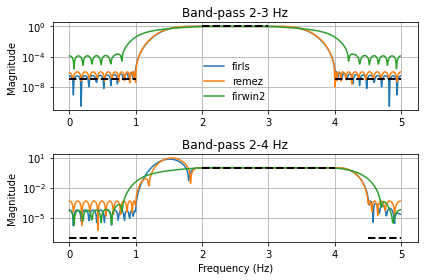

In [2]:
""" 
replicate example given on page. 
Create a figure with 2 subplots. 
"""
fig, axs = plt.subplots(2)
fs = 10.0  # Hz
desired = (0, 0, 1, 1, 0, 0)
"""
not quite sure how this for works.
ok, there are 2 ntupls in the enumerate function. enumerate is a way of grouping data for ntuples. 
- bi ends up being either 0 or 1 depending on which ntuple is in operation
- bands ends up being either the first or second ntuple
"""
for bi, bands in enumerate( ((0, 1, 2, 3, 4, 5), (0, 1, 2, 4, 4.5, 5)) ):
    print("bi: ", bi, " bands ", bands)
    """
    firls - FIR filter design using least-squares error minimization.
    params - 
        ntaps (73)
        bands - A monotonic nondecreasing sequence containing the band edges in Hz. 
                All elements must be non-negative and less than or equal to the Nyquist 
                frequency given by nyq.
        desired - A sequence the same size as bands containing the desired gain at the 
                  start and end point of each band.
        weight=None
        nyq=None
        fs=None - The sampling frequency of the signal. Each frequency in bands must 
                  be between 0 and fs/2 (inclusive). Default is 2.
    """
    fir_firls = signal.firls(73, bands, desired, fs=fs)
    """
    Calculate the minimax optimal filter using the Remez exchange algorithm.
    numtaps - The desired number of taps in the filter. The number of taps is the number of terms 
               in the filter, or the filter order plus one.
    bands - A monotonic sequence containing the band edges. All elements must be non-negative and 
            less than half the sampling frequency as given by fs.
    desired - A sequence half the size of bands containing the desired gain in each of the specified bands.
    weight - optional A relative weighting to give to each band region. The length of weight has to be 
            half the length of bands.
    
    not sure what the :: does in the desired array. Seems like step by 2 through the array. 
    """
    fir_remez = signal.remez(73, bands, desired[::2], fs=fs)
    """
    FIR filter design using the window method. Same basic arguments
    """
    fir_firwin2 = signal.firwin2(73, bands, desired, fs=fs)
    
    
    hs = list()
    ax = axs[bi]  # return the current axis base on the bi loop index. 
    """
    Make a super set of the three possible plots
    """
    for fir in (fir_firls, fir_remez, fir_firwin2):
        freq, response = signal.freqz(fir)
        hs.append(ax.semilogy(0.5*fs*freq/np.pi, np.abs(response))[0])
    """
    loop and create the band response. Zip is a function that returns an iterator of ntuples. 
    """
    for band, gains in zip(zip(bands[::2], bands[1::2]), zip(desired[::2], desired[1::2])):
        ax.semilogy(band, np.maximum(gains, 1e-7), 'k--', linewidth=2)
    
    if bi == 0:
        # first pass put the legend on the plot
        ax.legend(hs, ('firls', 'remez', 'firwin2'), loc='lower center', frameon=False)
    else:
        # second pass put the x label on the axis. 
        ax.set_xlabel('Frequency (Hz)')
        
    ax.grid(True)
    ax.set(title='Band-pass %d-%d Hz' % bands[2:4], ylabel='Magnitude')

fig.tight_layout()
plt.show()

So, I think I understand the example, lets try to create a low pass filter and then plot the response. 

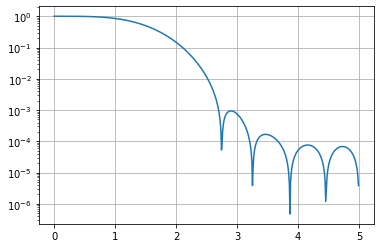

In [3]:
fs = 10.0  # Hz 
desired = (1, 1, 0, 0, 0, 0)
bands   = (0, 1, 2, 3, 4, 5) # half nyquist
# that is a shit ton of taps. 
# returns the coefficients
#fir = signal.remez(30, bands, desired[::2], fs=fs)
#fir = signal.firls(73, bands, desired, fs=fs)
fir = signal.firwin2(20, bands, desired, fs=fs)
freq, response = signal.freqz(fir)
plt.semilogy(0.5*fs*freq/np.pi, np.abs(response))
plt.grid()

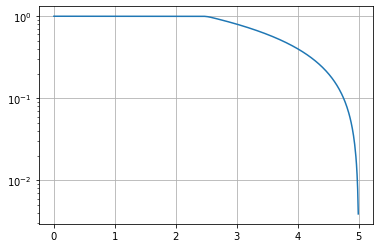

In [4]:
"""
A lowpass FIR filter with a response that is 1 on [0.0, 0.5], 
and that decreases linearly on [0.5, 1.0] from 1 to 0:
"""
taps = signal.firwin2(150, [0.0, 0.5, 1.0], [1.0, 1.0, 0.0])
"""
input to freqz
"""
freq, response = signal.freqz(taps)
plt.semilogy(0.5*fs*freq/np.pi, np.abs(response))
plt.grid()

In [5]:
# Remez example
def plot_response(w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(w, 20*np.log10(np.abs(h)))
    ax.set_ylim(-40, 5)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

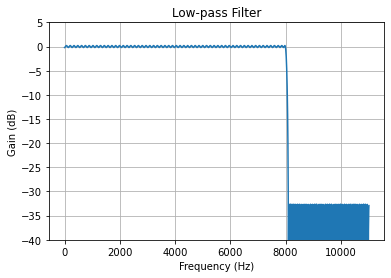

In [6]:
fs          = 22050   # Sample rate, Hz
cutoff      = 8000.0  # Desired cutoff frequency, Hz
trans_width = 100     # Width of transition from pass to stop, Hz
numtaps     = 325     # Size of the FIR filter. started at 325
taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], fs=fs)
"""
get the response using 
b - the taps
a - the divisor (used for FIR in this case 1)
worN {None, int, array_like}, optional
        If a single integer, then compute at that many frequencies (default is N=512). 
        This is a convenient alternative to:
fs - sample frequency
"""
w, h = signal.freqz(taps, [1], worN=2000, fs=fs)
plot_response(w, h, "Low-pass Filter")
plt.show()